In [ ]:
#! -*- coding: utf-8 -*-

In [1]:
%matplotlib inline

## GWpyのQ変換

- 1 - Open Data access with GWpy-nk.ipynb
- 2a - Filtering data with GWpy-nk.ipynb
- 2b - Filtering data with GWpy-nk.ipynb

では、データをロードし、時間領域、周波数領域でフィルタリングし、たくさんのプロットを作成しました。

フィルタリングには、LIGO検出器にどのような種類のノイズが存在するか、バイナリブラックホールの合併からの重力波信号を検出するためにどのような周波数が関係しているかについてのかなりの知識が必要でした。

このセクションでは、Q-transformと呼ばれる特別なフィルタを使用して、信号形態の知識なしに、データの時間 - 周波数表現を作成し、さまざまな周波数のフィーチャを選択する方法を説明します。

重力波データへのQ変換とその応用の詳細については、[この記事](https://doi.org/10.1088/0264-9381/21/20/024)を参照してください。

では、今回はGW170817を使用してデータをリロードしましょう：

In [1]:
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries

gps = event_gps('GW170817')
segment = (int(gps) - 30, int(gps) + 2)
hdata = TimeSeries.fetch_open_data('H1', *segment, tag='CLN', verbose=True, cache=True)

Fetched 1 URLs from https://losc.ligo.org for [1187008852 .. 1187008884)
Reading data... [Done]


[spectrogram](https://gwpy.github.io/docs/stable/spectrogram/)にある様に`hdata`　`TimeSeries`の`q_transform（）`メソッドを使用して、時間 - 周波数表現を作成することができます

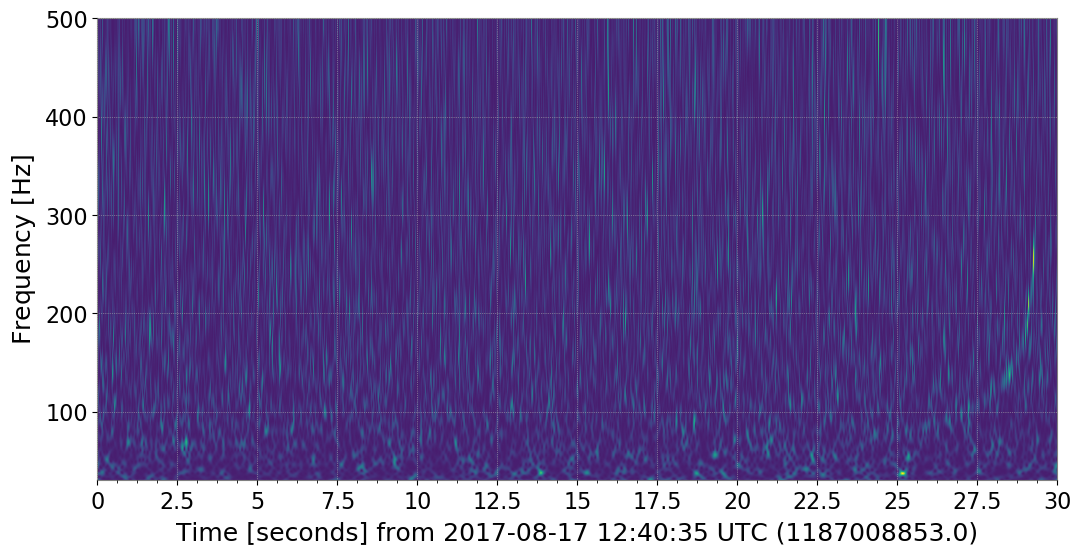

In [2]:
hq = hdata.q_transform(frange=(30, 500))
plot = hq.plot()

ここでは、バイナリ中性子星合併の曖昧な軌跡を見ていますが、それは見た目が汚いです。これは、Q値が低い（Q = 5）最高エネルギーの時間 - 周波数ピクセルが見つかったためです。これは、バイナリ中性子星のような長時間の信号ではうまく機能しません。
より高いQ（Q〜= 100）の狭いQ範囲を使用してQ-変換を再実行して、BNSトラックをより良く解決することができます。

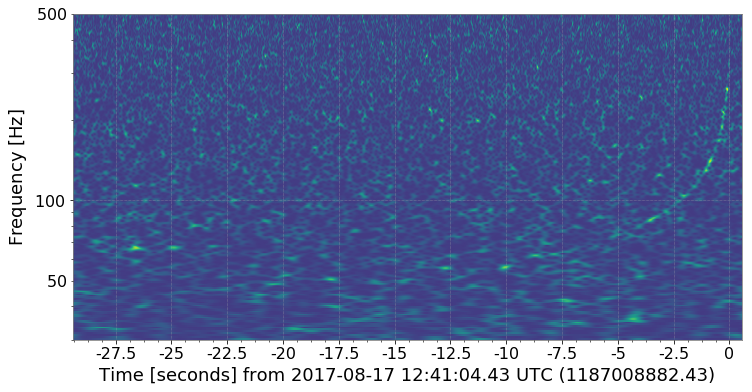

In [3]:
hq = hdata.q_transform(frange=(30, 500), qrange=(100, 110))
plot = hq.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')

今我々は、BNSマージャーの美しい、明確な軌跡を見ることができます.BNSのマージャーは、T = 0のマージャー時刻まで、約-4秒（良く見ると-10秒）見えます。

LIGO-Livingstonのデータを使って演習を繰り返して、さらに注目すべきものを見ることができます。
まずLivingstonデータをダウンロードしてフィルタリングします：

In [4]:
ldata = TimeSeries.fetch_open_data('L1', *segment, tag='CLN', verbose=True)

Fetched 1 URLs from https://losc.ligo.org for [1187008852 .. 1187008884)
Reading data... [Done]


私たちはHanford Q-transformで使用したのと同じパラメータを使って、 `ldata` `TimeSeries`をQ-transformを使って処理することができます：

In [5]:
lq = ldata.q_transform(frange=(30, 500), qrange=(100, 110))

今度は両方の干渉計からのデータを含む新しい図を作ることができます：

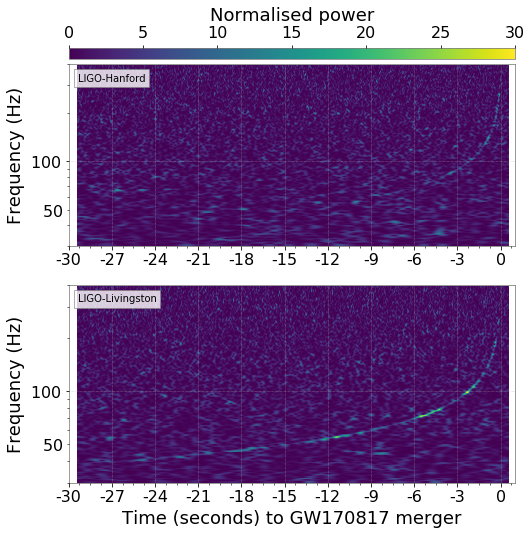

In [6]:
# create the figure and plot the data on separate axes
from matplotlib import pyplot
from gwpy.plotter import TimeSeriesPlot
plot = pyplot.figure(figsize=(8, 8), FigureClass=TimeSeriesPlot)
hax = plot.add_subplot(2, 1, 1)
hax.plot(hq, vmin=0, vmax=30)
lax = plot.add_subplot(2, 1, 2)
lax.plot(lq, vmin=0, vmax=30)

# add hidden elements that we can use for labelling
hax.plot(gps, 0, label='LIGO-Hanford', visible=False)
hax.legend(loc='upper left', handlelength=0, handletextpad=0)
lax.plot(gps, 0, label='LIGO-Livingston', visible=False)
lax.legend(loc='upper left', handlelength=0, handletextpad=0)

# format the axes
for ax in plot.axes:
    ax.set_epoch(gps)
    ax.set_xlim(gps-30, gps+1)
    ax.set_yscale('log')
    ax.set_ylim(30, 400)
    ax.set_ylabel('Frequency (Hz)')
hax.set_xlabel('')
lax.set_xlabel('Time (seconds) to GW170817 merger')

# finalise
plot.add_colorbar(ax=hax, label='Normalised power', location='top')

LIGO-LivingstonデータのT = -25秒からBNSマージャーを見ることができます。

これは基本的に以下のはBNSディスカッション記事の図1を作成するために使用されたものと同じ手順（および同じコード）です
'_Observation of Gravitational Waves from a Binary Neutron Star Inspiral_' [[link](https://doi.org/10.1103/PhysRevLett.119.161101)]